In [2]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append("./comocma/")

In [4]:
import cma, como

# Setting parameters

In [5]:
dimension = 10  # dimension of the search space
num_kernels = 11 # number of single-objective solvers (number of points on the front)
sigma0 = 0.2    # initial step-sizes

# Instanciate a multiobjective (bi or many) solver

In [6]:
list_of_solvers = como.get_cmas(num_kernels * [dimension * [0]], sigma0, {'tolx': 10**-8}) # produce `num_kernels cma instances`
moes = como.Sofomore(list_of_solvers, reference_point = [11,11]) # create a como-cma-es instance

# Setting a callable bi-objective function

In [7]:
fitness = como.FitFun(cma.ff.sphere, lambda x: cma.ff.sphere(x-1))
#fitness = como.FitFun(lambda x: 1/len(x) * cma.ff.sphere(x), lambda x: 1/len(x) * cma.ff.sphere(x-1)) 
# a callable bi-objective function

# The "Optimize" interface

In [10]:
moes.optimize(fitness, iterations=276)

  300   3000 9.985189664593187e+01 1.8e+00 6.50e-02  5e-02  6e-02
  400   4000 1.008444614228408e+02 1.8e+00 5.86e-02  4e-02  5e-02
  500   5000 1.010967627909908e+02 1.9e+00 2.73e-02  2e-02  2e-02


<IPython.core.display.Javascript object>


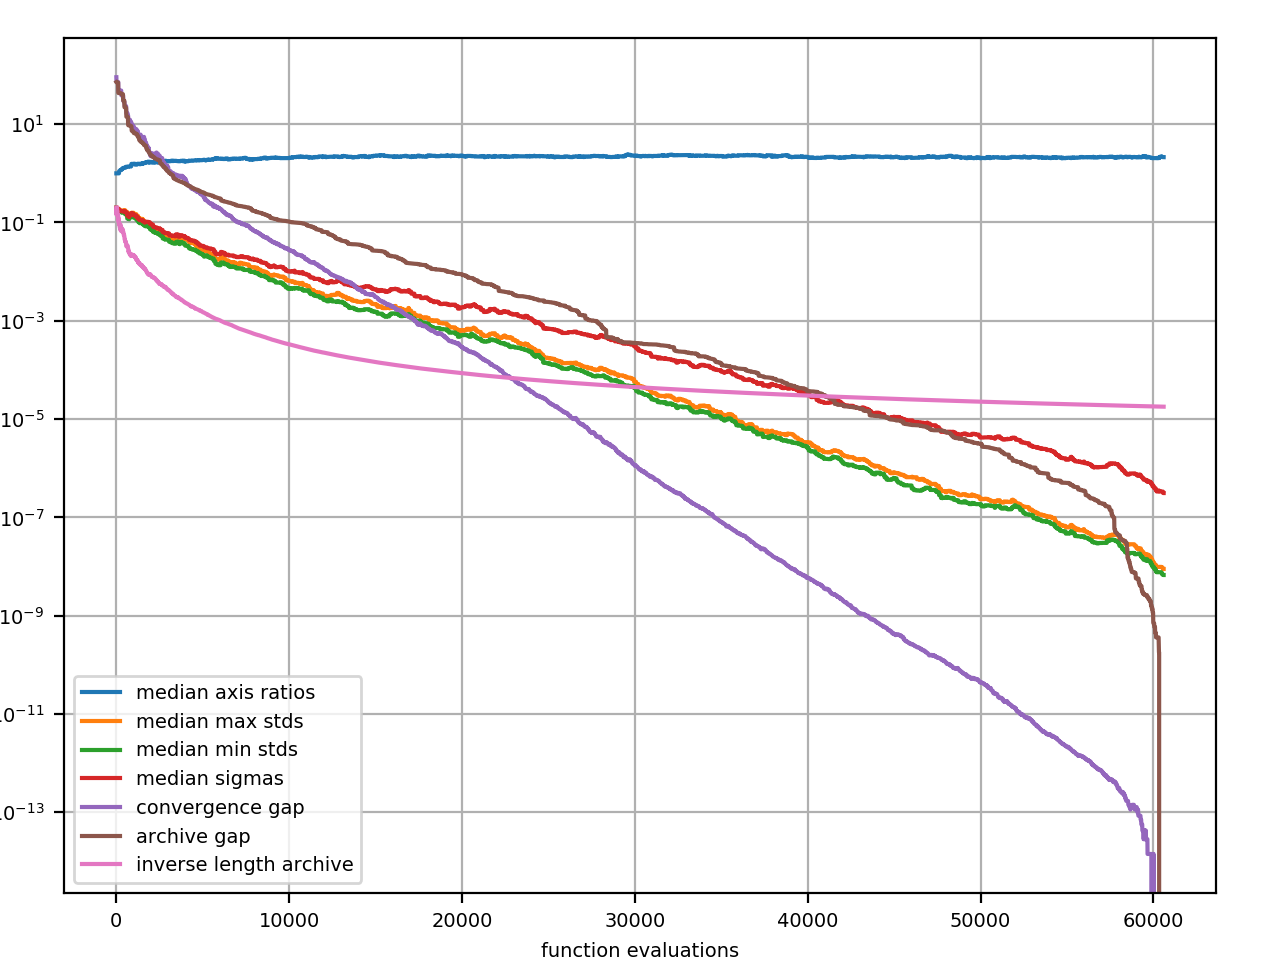

In [18]:
moes.logger.plot_divers()

<IPython.core.display.Javascript object>


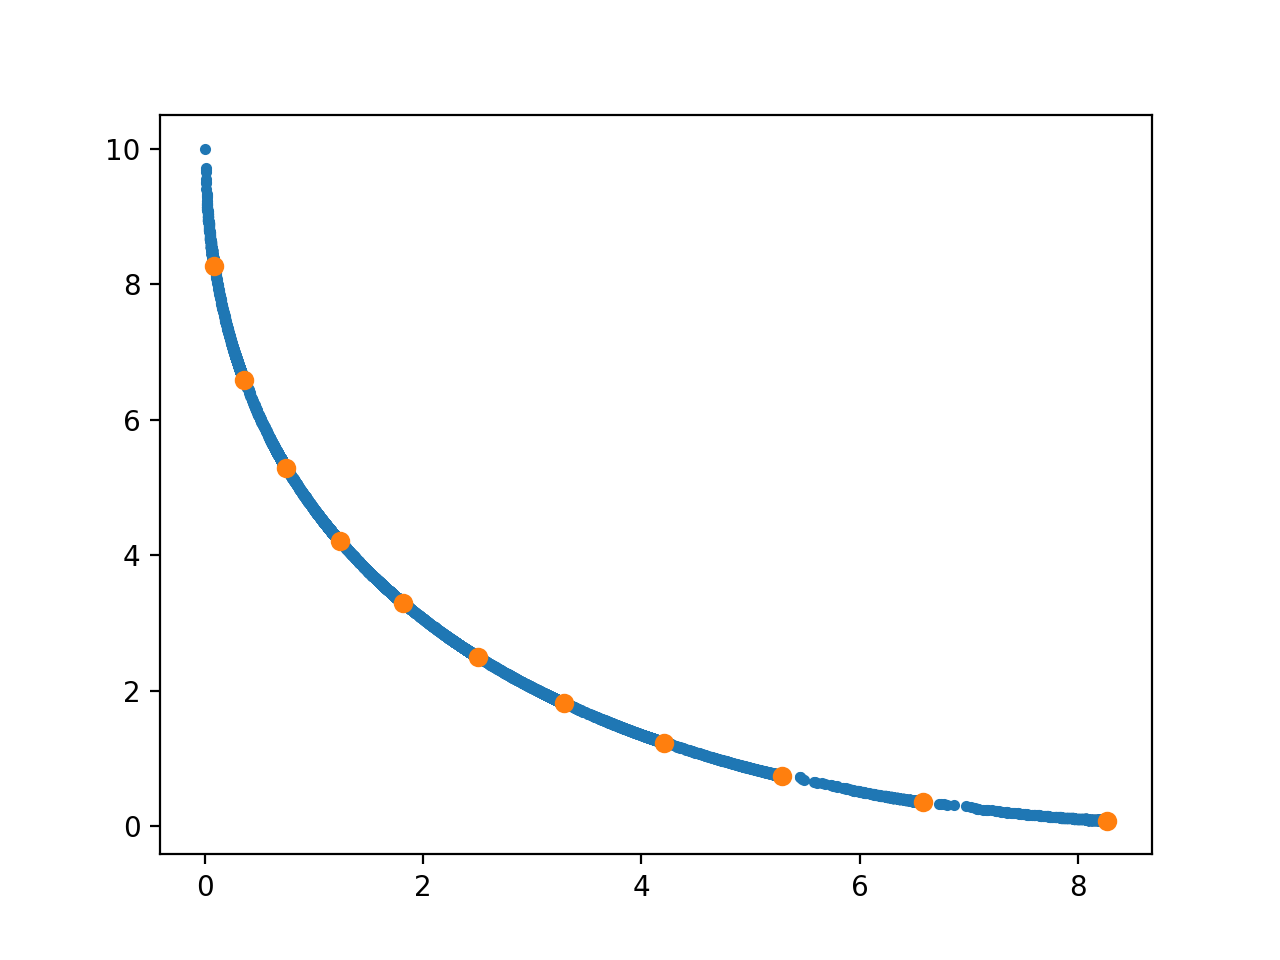

In [19]:
figure()
moes.logger.plot_front()

<IPython.core.display.Javascript object>


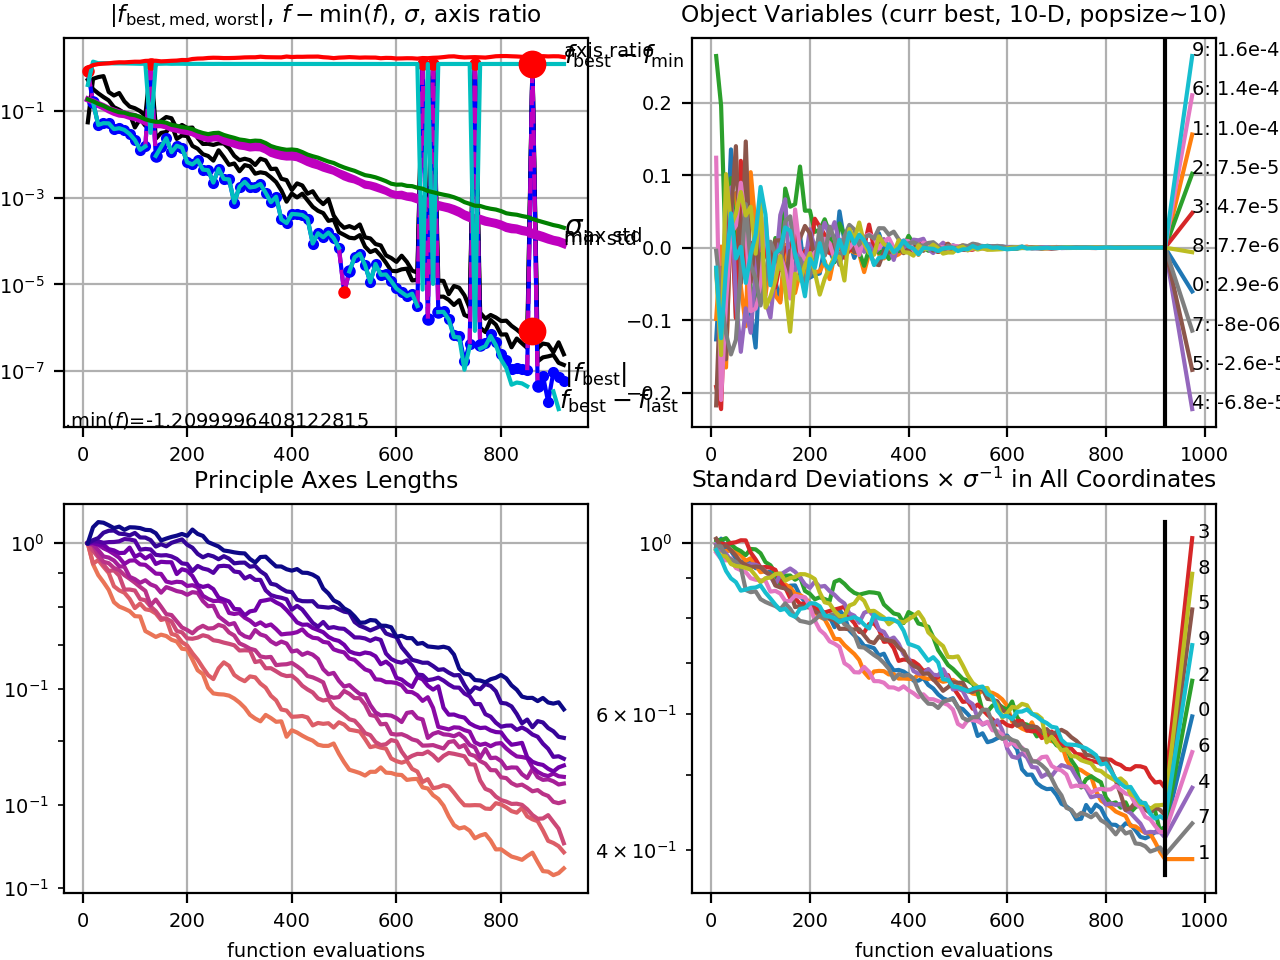

In [7]:
cma.plot("cma_kernels/0")

# Plot the estimated pareto front

<IPython.core.display.Javascript object>


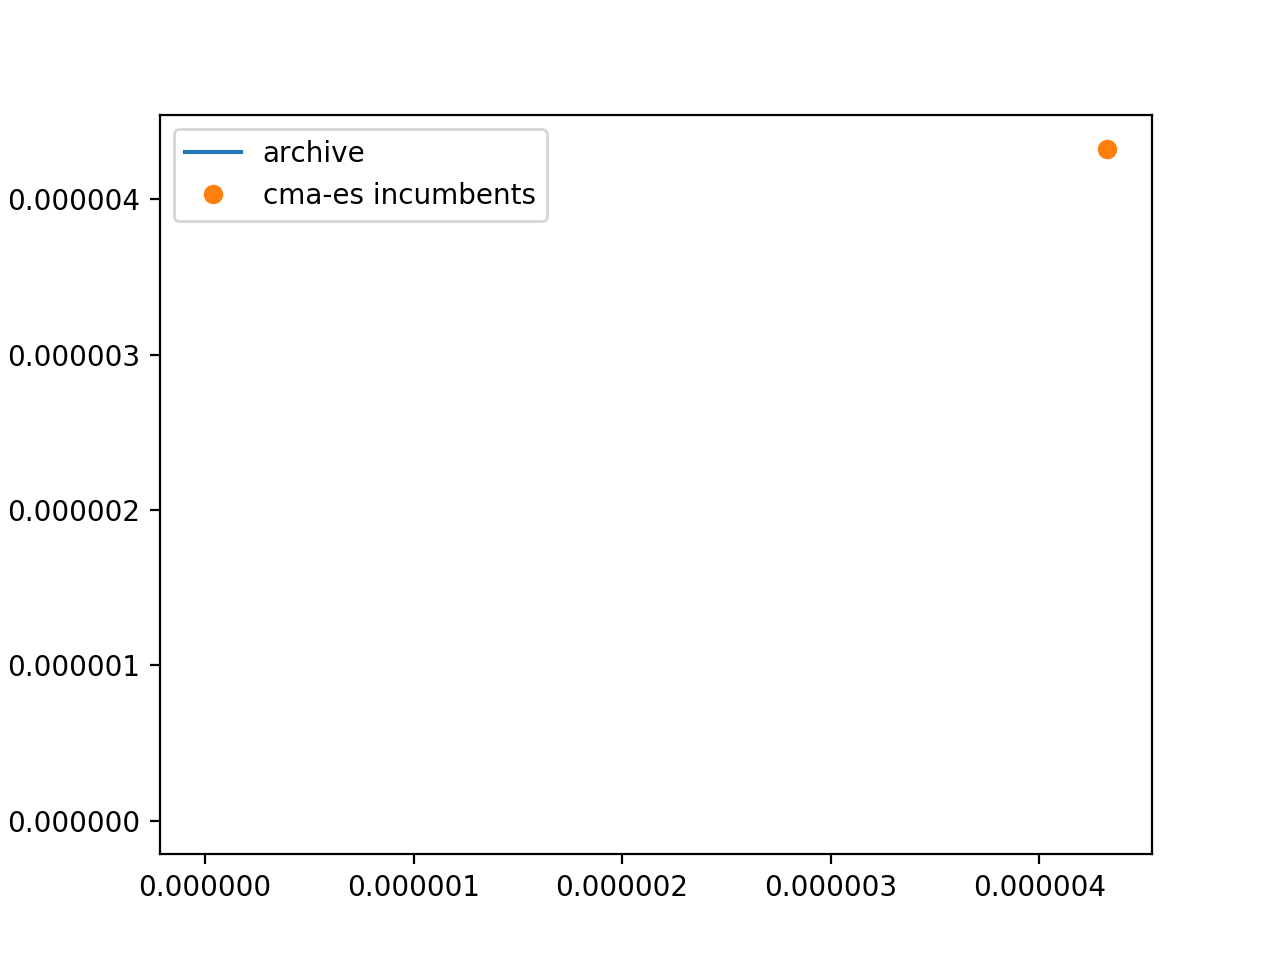

In [6]:
figure()
moes.logger.plot_front()      

# Plot some ratios about the evolution of non-dominated points

<IPython.core.display.Javascript object>


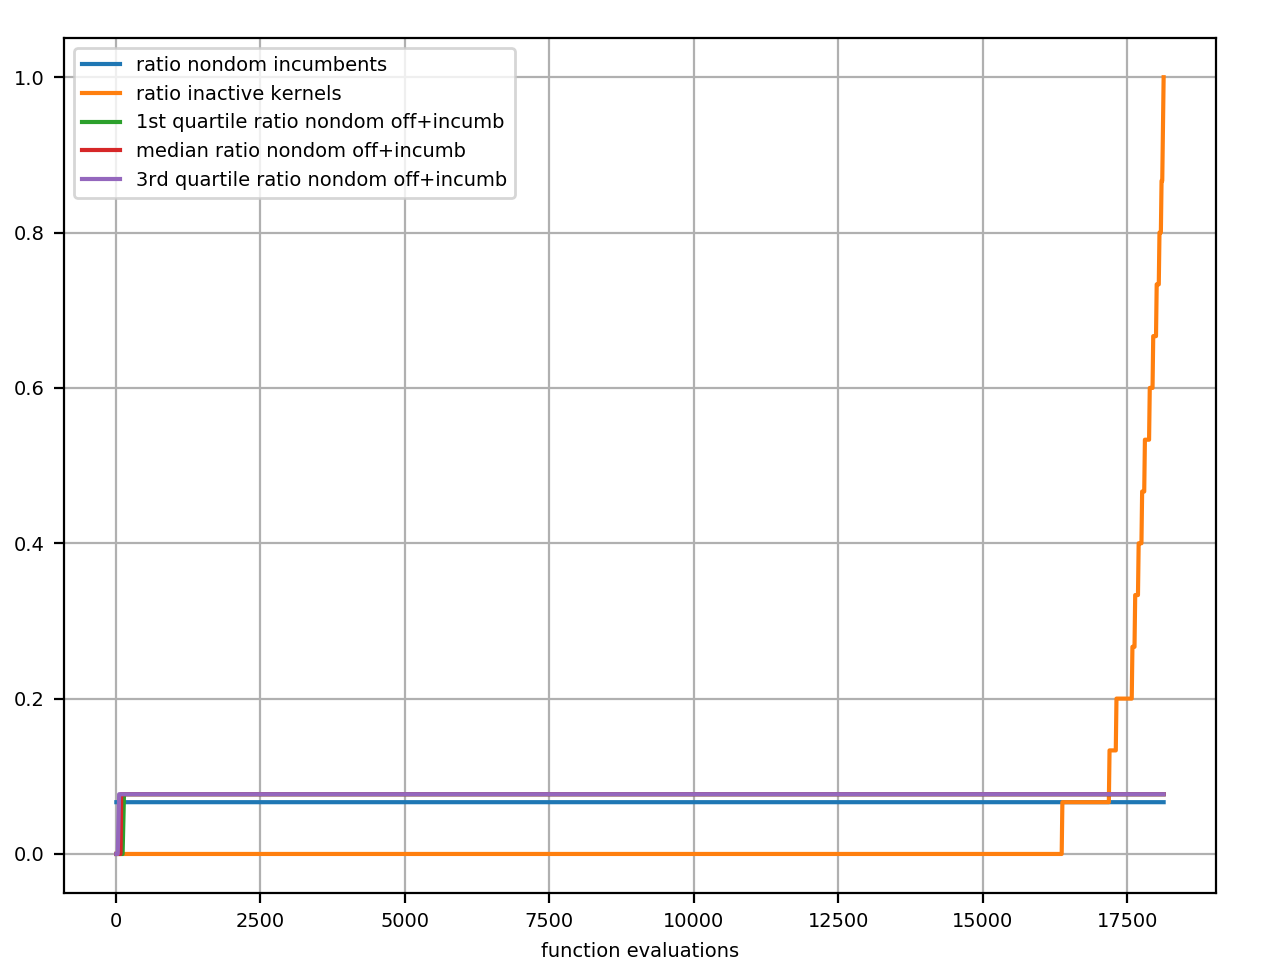

In [7]:
figure()
moes.logger.plot_ratios()     

# Divers plots about the multiobjective solver convergence

<IPython.core.display.Javascript object>


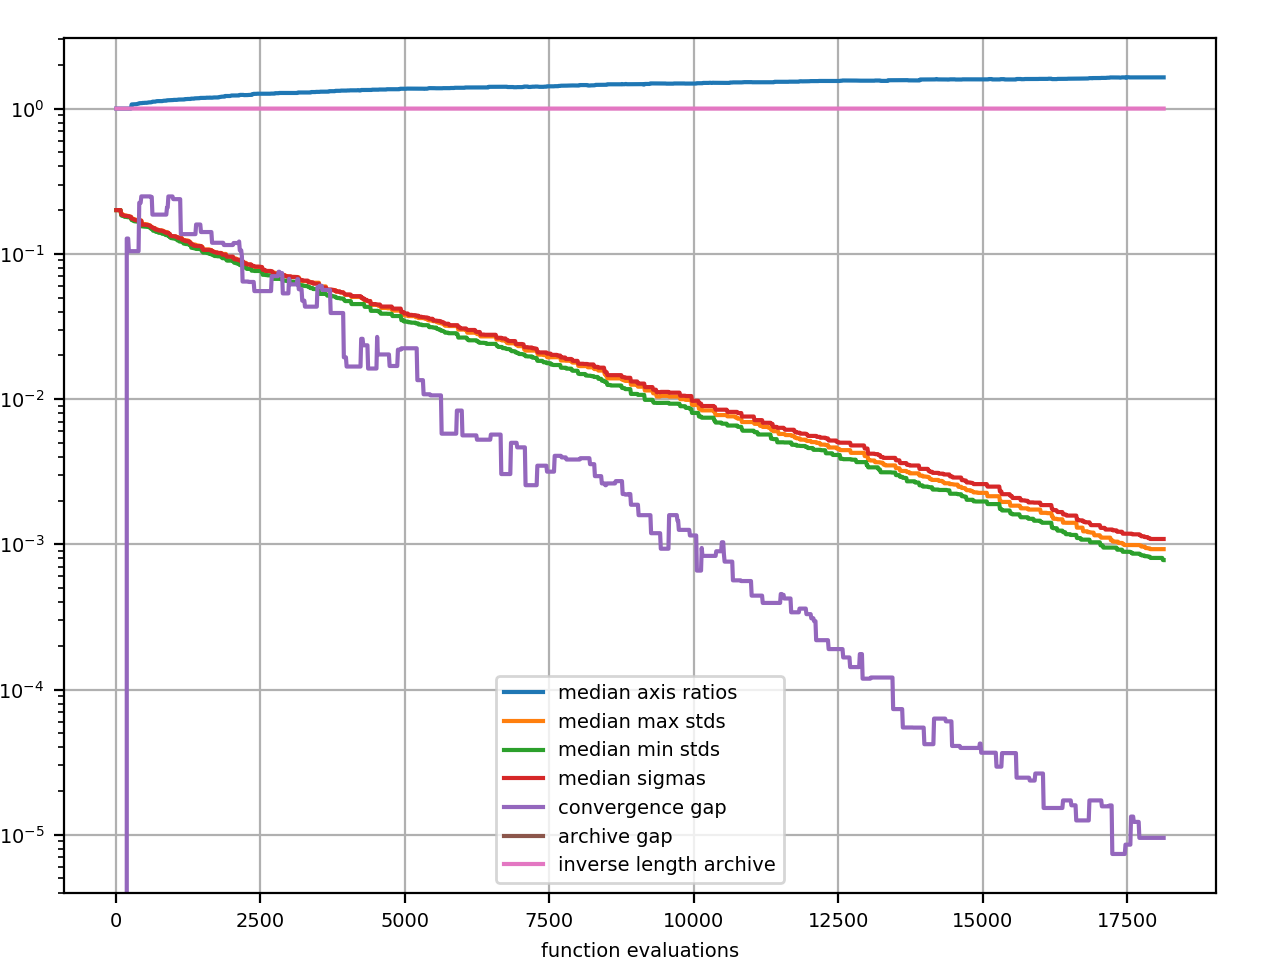

In [8]:
figure()
moes.logger.plot_divers()     

# Plot median standard deviations of the single-objectve solver instances (cma-es)

<IPython.core.display.Javascript object>


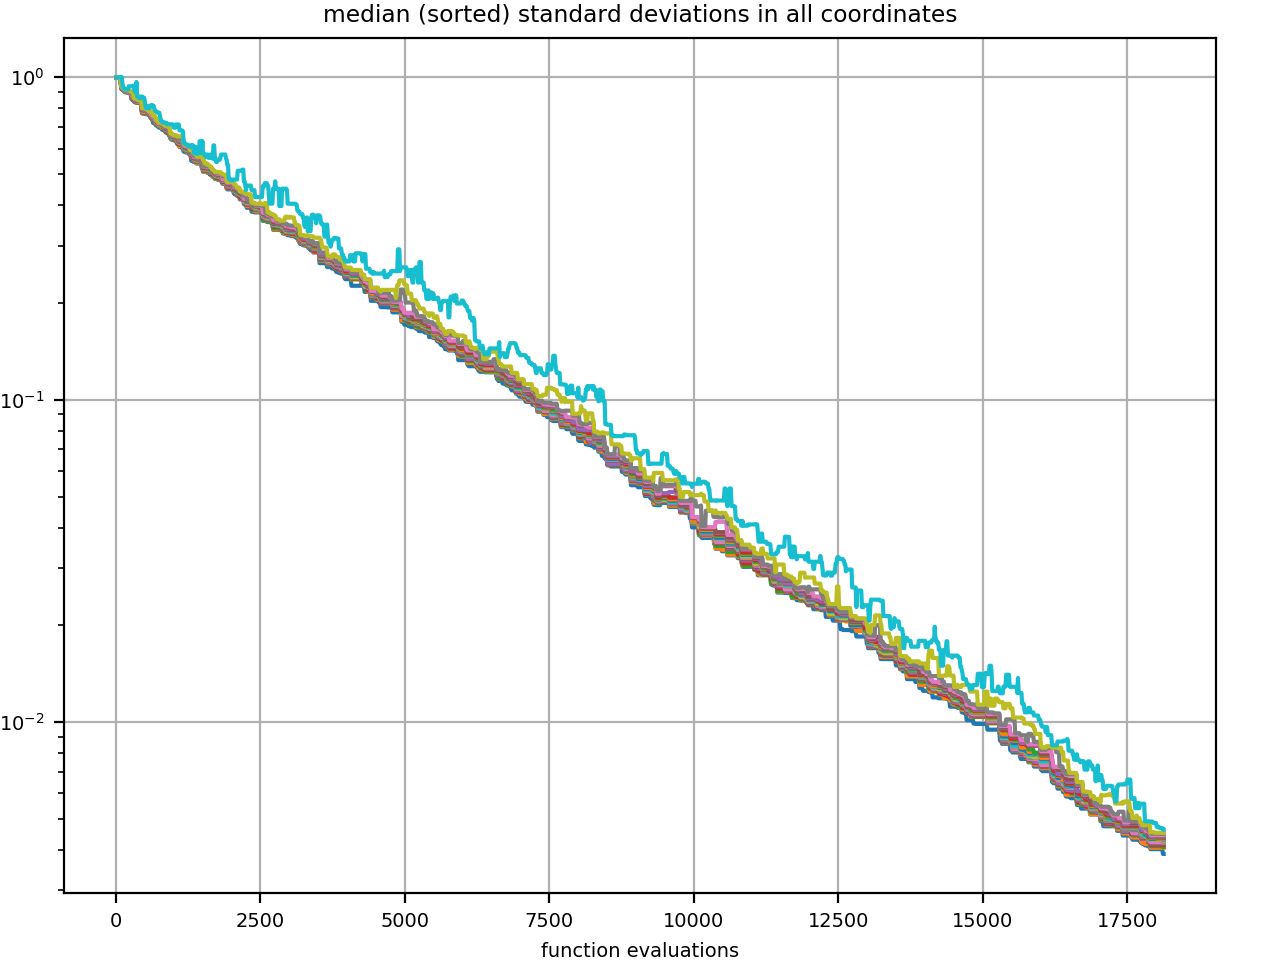

In [9]:
figure()
moes.logger.plot_stds()        

<IPython.core.display.Javascript object>


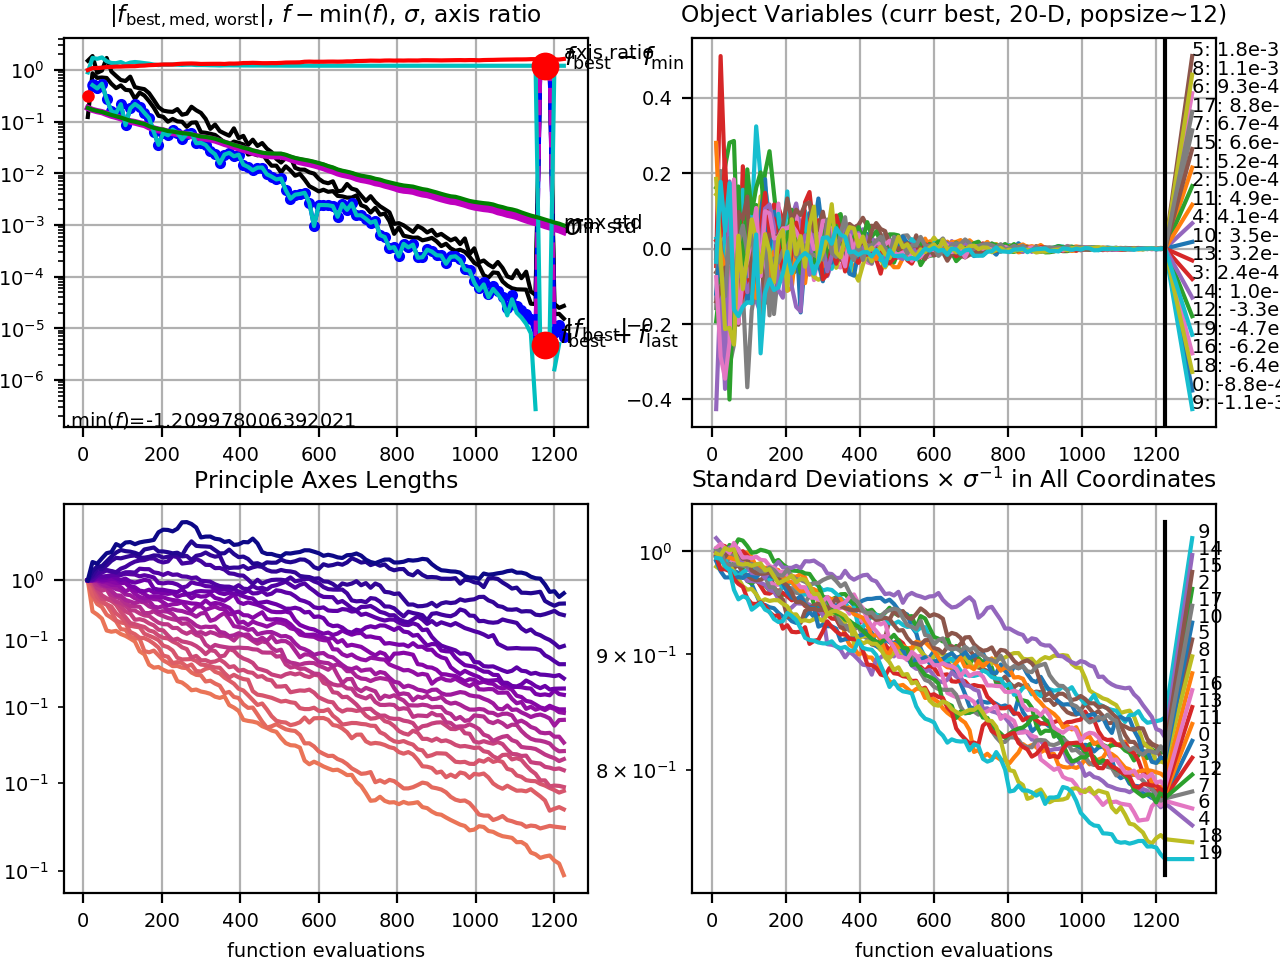

In [15]:
cma.plot("cma_kernels/0")

<IPython.core.display.Javascript object>


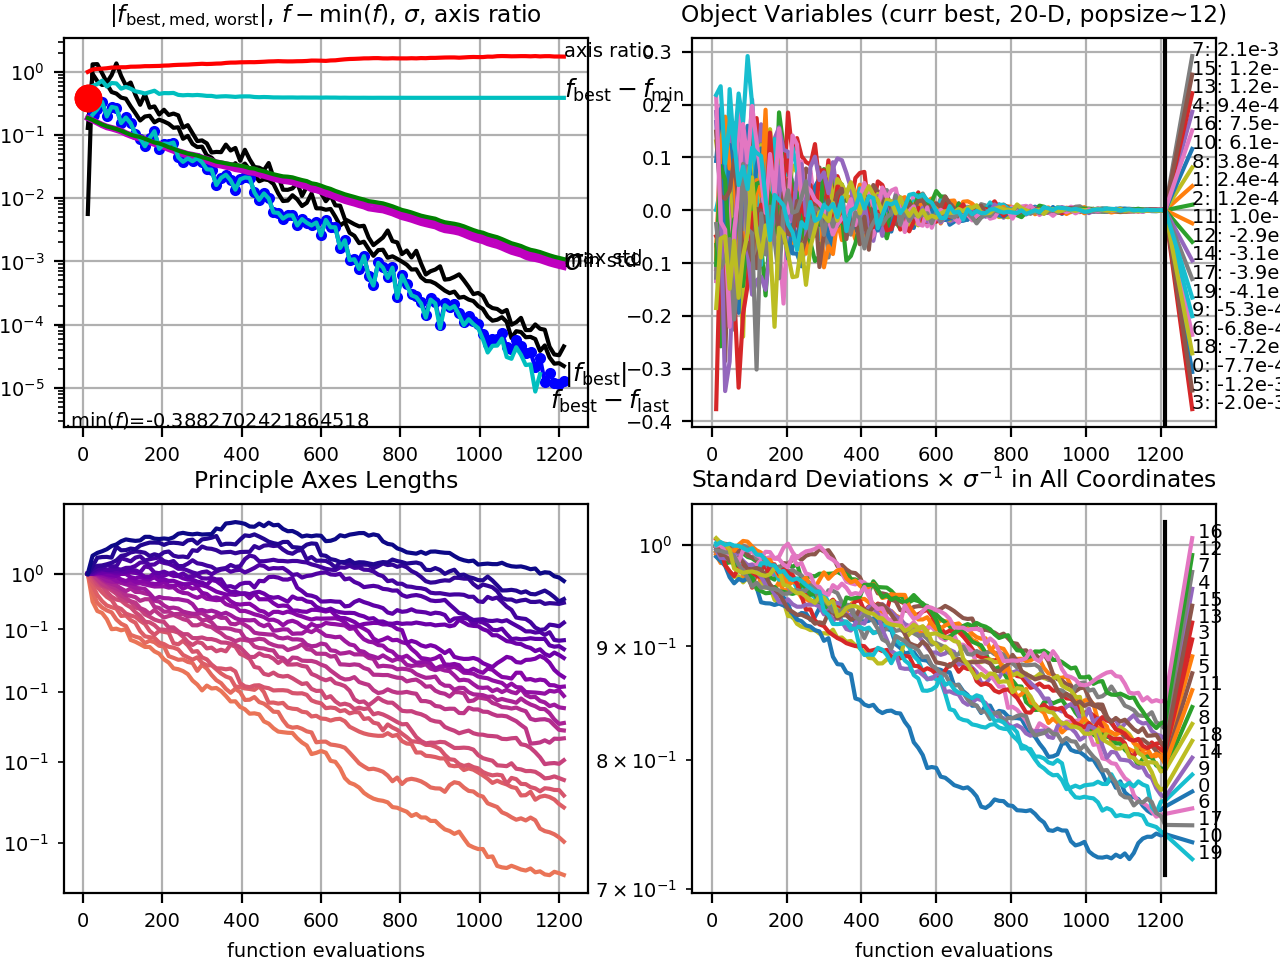

In [16]:
cma.plot("cma_kernels/1")

<IPython.core.display.Javascript object>


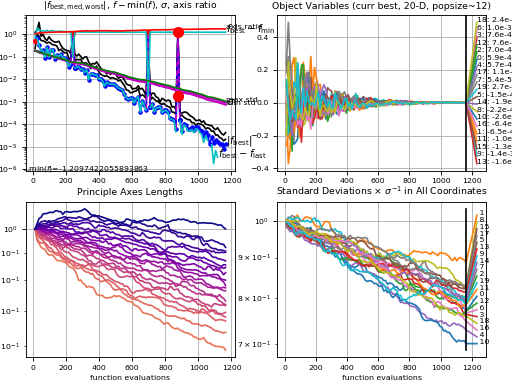

In [26]:
cma.plot("cma_kernels/2")

In [13]:
moes.termination_status

{0: {'tolx': 0.001},
 1: {'tolx': 0.001},
 2: {'tolx': 0.001},
 3: {'tolx': 0.001},
 4: {'tolx': 0.001},
 5: {'tolx': 0.001},
 6: {'tolx': 0.001},
 7: {'tolx': 0.001},
 8: {'tolx': 0.001},
 9: {'tolx': 0.001},
 10: {'tolx': 0.001},
 11: {'tolx': 0.001},
 12: {'tolx': 0.001},
 13: {'tolx': 0.001},
 14: {'tolx': 0.001}}

In [ ]:
moes.best_hypervolume_pareto_front

In [ ]:
float(moes.best_hypervolume_pareto_front)

In [ ]:
float(moes.archive.hypervolume)
# exact whole hypervolume Pareto front value: 1.0433333333...

# The "ask and tell" interface (generate and update in the CS community)

# Search space + Objective space boundary constraints

In [9]:
list_of_solvers = como.get_cmas(num_kernels * [dimension * [0]], 0.2, inopts = {'bounds': [0.2, 0.9], 
                                                                                'CMA_elitist':'init', 'tolx': 10**-7,
                                                                               'popsize': 32}) # produce `num_kernels cma instances`
moes = como.Sofomore(list_of_solvers, reference_point = [0.6,0.9]) # create a como-cma-es instance

In [10]:
while not moes.stop():
    solutions = moes.ask("all")
    objective_values = [fitness(x) for x in solutions]
    moes.tell(solutions, objective_values)
    moes.disp()          # display datas during the optimization
    moes.logger.add()    # logging data after each `ask` and `tell` call


Iterat #Fevals   Hypervolume   axis ratios   sigmas   min&max stds
                                  (median)  (median)    (median)
    1    180 1.990425600000000e-01 1.0e+00 1.88e-01  2e-01  2e-01
    2    360 2.279075246432772e-01 1.1e+00 1.87e-01  2e-01  2e-01
    3    540 2.436105134581627e-01 1.2e+00 1.90e-01  2e-01  2e-01
  100  18000 3.607157703968831e-01 2.1e+00 1.80e-02  1e-02  2e-02
  200  35172 3.635275131024869e-01 2.1e+00 5.95e-03  4e-03  5e-03
  300  49788 3.637412031970786e-01 2.2e+00 1.29e-03  8e-04  1e-03
  320  50784 3.637421277015990e-01 2.2e+00 1.26e-03  7e-04  9e-04


In [12]:
moes.pareto_set

[array([0.20000445, 0.2       , 0.20000039, 0.20000095, 0.20000009,
        0.20000021, 0.2000011 , 0.20000002, 0.20000008, 0.20000035,
        0.20000046, 0.20000498, 0.2       , 0.20000459, 0.20000001,
        0.20000021, 0.20000266, 0.20000025, 0.20000101, 0.2       ]),
 array([0.24857754, 0.24795312, 0.24743948, 0.24818514, 0.24888739,
        0.24959692, 0.2481225 , 0.24842046, 0.24759793, 0.2481031 ,
        0.24803089, 0.24813073, 0.24871435, 0.24811248, 0.24853174,
        0.24910705, 0.24777874, 0.24800085, 0.2476342 , 0.24861104]),
 array([0.6583152 , 0.66008012, 0.66130633, 0.66078852, 0.66158691,
        0.65931003, 0.66098731, 0.66039392, 0.65948876, 0.65929983,
        0.6607938 , 0.66023904, 0.65911118, 0.65987306, 0.66054659,
        0.65894248, 0.66161967, 0.66073042, 0.66050937, 0.65840804]),
 array([0.58669719, 0.58797561, 0.58658233, 0.58596622, 0.5859122 ,
        0.58898741, 0.58624988, 0.58661267, 0.58653637, 0.58769657,
        0.58730683, 0.58661619, 0.58674433

In [ ]:
moes.pareto_front

<IPython.core.display.Javascript object>


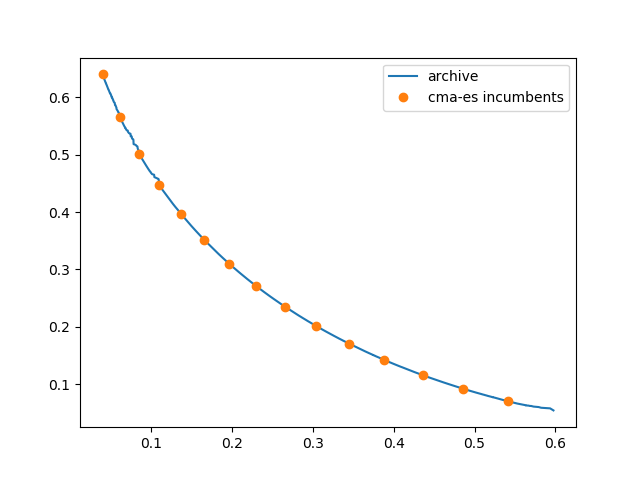

In [11]:
figure()
moes.logger.plot_front()      # plot the estimated pareto front

In [ ]:
figure()
moes.logger.plot_ratios()     # plot some ratios about the evolution of non-dominated points

In [ ]:
figure()
moes.logger.plot_divers()     # plot divers about the convergence

In [ ]:
figure()
moes.logger.plot_stds()        # plot median standard deviations of the single-objectve solver instances (cma-es)

In [ ]:
cma.plot("cma_kernels/10")

In [2]:
import numpy as np

In [5]:
4 + np.floor(3 * np.log(10))

10.0

In [6]:
121-100/6

104.33333333333333

In [5]:
import cma

In [8]:
es = cma.CMAEvolutionStrategy(10 * [0], 0.2, {'verbose':-9})

In [10]:
while not es.stop():
    solutions = es.ask()
    values = [cma.ff.sphere(sol) for sol in solutions]
    es.tell(solutions, values)
    es.logger.add()

In [1]:
import cma 

In [2]:
es = cma.CMAEvolutionStrategy(10 * [0], 0.2)

(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=69463, Thu Feb  6 16:09:45 2020)


In [5]:
cma.CMAOptions('tol')

{'mindx': '0  #v minimal std in any arbitrary direction, cave interference with tol*',
 'minstd': '0  #v minimal std (scalar or vector) in any coordinate direction, cave interference with tol*',
 'tolconditioncov': '1e14  #v stop if the condition of the covariance matrix is above `tolconditioncov`',
 'tolfacupx': '1e3  #v termination when step-size increases by tolfacupx (diverges). That is, the initial step-size was chosen far too small and better solutions were found far away from the initial solution x0',
 'tolfun': '1e-11  #v termination criterion: tolerance in function value, quite useful',
 'tolfunhist': '1e-12  #v termination criterion: tolerance in function value history',
 'tolstagnation': 'int(100 + 100 * N**1.5 / popsize)  #v termination if no improvement over tolstagnation iterations',
 'tolupsigma': '1e20  #v sigma/sigma0 > tolupsigma * max(eivenvals(C)**0.5) indicates "creeping behavior" with usually minor improvements',
 'tolx': '1e-11  #v termination criterion: toleranc

In [7]:
es.opts['tolx'] = 10**-4

In [8]:
es.opts

{'AdaptSigma': True,
 'CMA_active': True,
 'CMA_cmean': 1,
 'CMA_const_trace': False,
 'CMA_diagonal': 0.0,
 'CMA_eigenmethod': <function numpy.linalg.eigh(a, UPLO='L')>,
 'CMA_elitist': False,
 'CMA_injections_threshold_keep_len': 0,
 'CMA_mirrors': False,
 'CMA_mirrormethod': 2,
 'CMA_mu': None,
 'CMA_on': 1,
 'CMA_sampler': None,
 'CMA_sampler_options': {},
 'CMA_rankmu': 1.0,
 'CMA_rankone': 1.0,
 'CMA_recombination_weights': None,
 'CMA_dampsvec_fac': inf,
 'CMA_dampsvec_fade': 0.1,
 'CMA_teststds': None,
 'CMA_stds': None,
 'CSA_dampfac': 1,
 'CSA_damp_mueff_exponent': 0.5,
 'CSA_disregard_length': False,
 'CSA_clip_length_value': None,
 'CSA_squared': False,
 'BoundaryHandler': cma.constraints_handler.BoundTransform,
 'bounds': [[None], [None]],
 'conditioncov_alleviate': [100000000.0, 1000000000000.0],
 'eval_final_mean': True,
 'fixed_variables': None,
 'ftarget': -inf,
 'integer_variables': [],
 'is_feasible': <function cma.evolution_strategy.is_feasible(x, f)>,
 'maxfevals':